In [49]:
#Import python libraries
#Data can be found at https://www.kaggle.com/datasets/grubenm/austin-weather

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [50]:
#Import weather data
data = pd.read_csv('weather.csv')
data.head(10)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
5,2013-12-26,57,48,39,39,36,33,79,63,47,...,30.4,30.34,10,9,7,12,3,17,0,
6,2013-12-27,60,53,45,41,39,37,83,65,47,...,30.39,30.34,10,9,7,7,1,11,T,
7,2013-12-28,62,51,40,43,39,33,92,64,36,...,30.17,30.04,10,10,7,10,2,14,T,
8,2013-12-29,64,50,36,49,41,28,92,76,60,...,30.1,29.99,10,10,4,17,5,24,0,
9,2013-12-30,44,40,35,31,26,21,75,60,45,...,30.33,30.26,10,10,10,13,5,21,0,


In [51]:
data['Date']=pd.to_datetime(data['Date'])

In [52]:
#Display dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1319 non-null   datetime64[ns]
 1   TempHighF                   1319 non-null   int64         
 2   TempAvgF                    1319 non-null   int64         
 3   TempLowF                    1319 non-null   int64         
 4   DewPointHighF               1319 non-null   object        
 5   DewPointAvgF                1319 non-null   object        
 6   DewPointLowF                1319 non-null   object        
 7   HumidityHighPercent         1319 non-null   object        
 8   HumidityAvgPercent          1319 non-null   object        
 9   HumidityLowPercent          1319 non-null   object        
 10  SeaLevelPressureHighInches  1319 non-null   object        
 11  SeaLevelPressureAvgInches   1319 non-null   object      

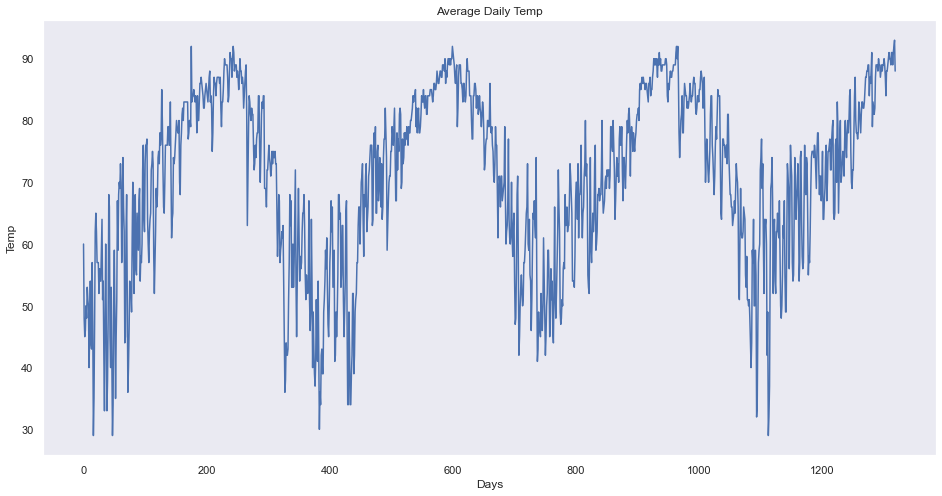

In [54]:
#Plot data
plt.figure(figsize=(16, 8))
plt.plot(data.TempAvgF)
plt.title('Average Daily Temp')
plt.ylabel('Temp')
plt.xlabel('Days')
plt.grid(False)
plt.show()

In [55]:
#Check for null values in each column"
for c in data.columns:
    print(c, data[c].isnull().sum()) 

Date 0
TempHighF 0
TempAvgF 0
TempLowF 0
DewPointHighF 0
DewPointAvgF 0
DewPointLowF 0
HumidityHighPercent 0
HumidityAvgPercent 0
HumidityLowPercent 0
SeaLevelPressureHighInches 0
SeaLevelPressureAvgInches 0
SeaLevelPressureLowInches 0
VisibilityHighMiles 0
VisibilityAvgMiles 0
VisibilityLowMiles 0
WindHighMPH 0
WindAvgMPH 0
WindGustMPH 0
PrecipitationSumInches 0
Events 0


In [56]:
#Define function for Mean Squared Error
def mse(observations, estimates):
    
    
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)/len(observations)
    
    return mse

In [57]:
#Define exponential smoothing function
def exp_smoothing(obser, alpha):

    result = [obser[0]] # first value is same as series
    for i in range(1, len(obser)):
        result.append(alpha * obser[i] + (1 - alpha) * result[i-1])
    return result

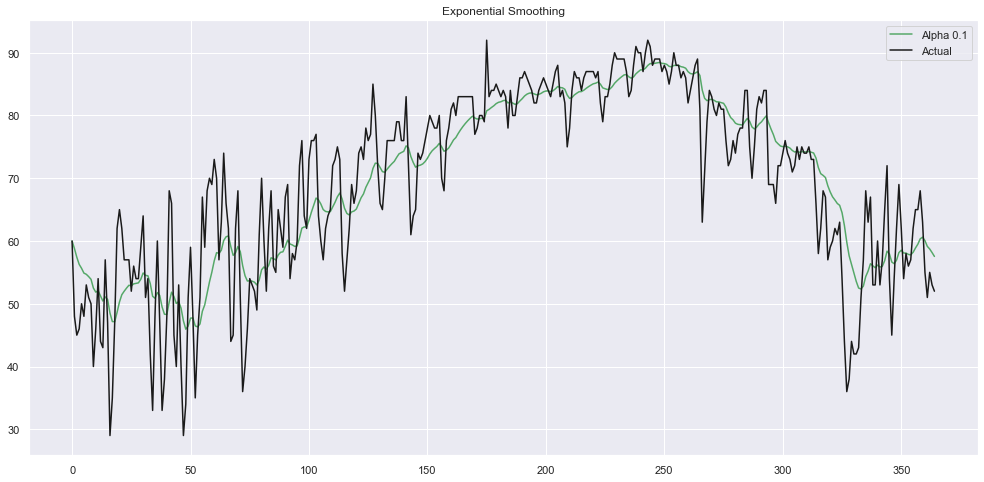

In [58]:
#Plot Exponentia Smoothing data
obser=data['TempAvgF']
alpha=.1
plt.figure(figsize=(17, 8))
plt.plot(exp_smoothing(obser[:365],alpha),'g' ,label="Alpha {}".format(alpha))
plt.plot(obser[:365], "k", label = "Actual")
plt.legend(loc="best")
plt.axis('tight')
plt.title("Exponential Smoothing")
plt.grid(True);

In [59]:
#Define Double Exponential Smoothing Function
def double_exp_smoothing(obser, alpha, beta):

    result = [obser[0]]
    for i in range(1, len(obser)+1):
        if i == 1:
            level, trend = obser[0], obser[1] - obser[0]
        if i >= len(obser):
            value = result[-1]
        else:
            value = obser[i]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

In [60]:
#Define function to plot Double Exponential Smoothing with multiple alpha and beta values
def plot_double_exp(obser, alphas, betas):
     
    plt.figure(figsize=(16, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exp_smoothing(obser, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(obser.values, 'k',label = "Actual")
    plt.legend(loc="best")
    plt.title("Double Exponential Smoothing")
    plt.grid(True)



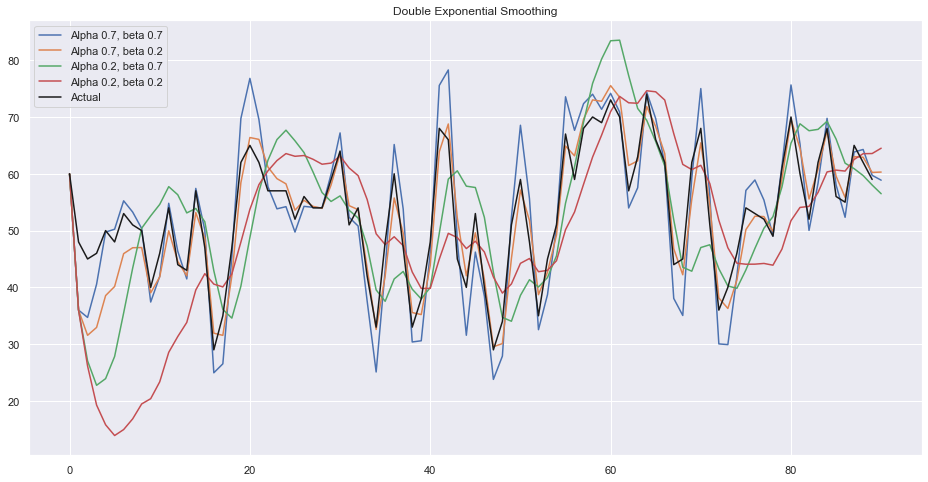

In [61]:
#Plot first 90 days with multiple alpha and beta values
plot_double_exp(data['TempAvgF'][:90], alphas=[0.7, 0.2], betas=[0.7, 0.2])

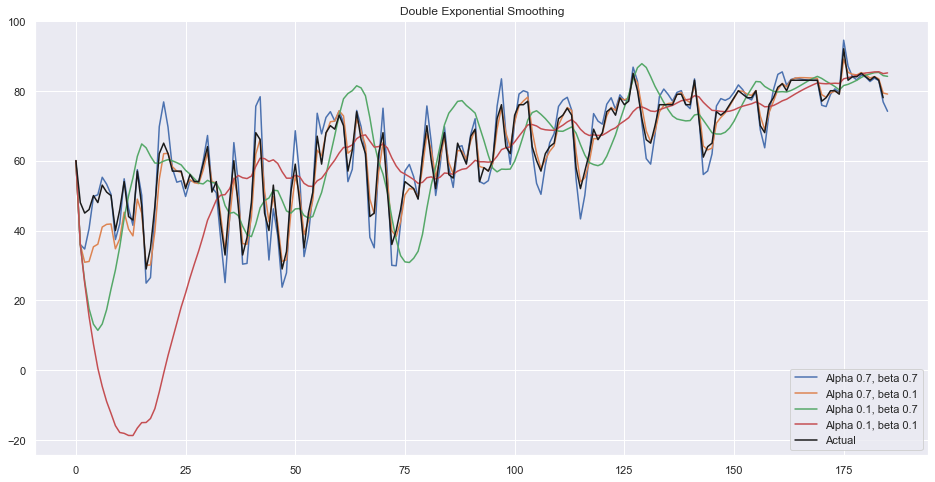

In [62]:
#Plot first 185 days of Double Exponential Smoothing
plot_double_exp(data['TempAvgF'][:185], alphas=[0.7, 0.1], betas=[0.7, 0.1])

In [63]:
#Define function to set initial trend values for Triple Exponential Smoothing
def initial_trend(obser, season_len):
    total = 0.0
    for i in range(season_len):
        total += (obser[i + season_len] - obser[i]) / season_len

    trend = total / season_len
    return trend

In [66]:
#Get seasonal averages 
obser=np.array(data['TempAvgF'])
season_len=365
nseasons = len(obser)// season_len

season_averages = np.zeros(nseasons)
for x in range(nseasons):
    start = season_len * x
    end = start + season_len
    season_average = np.sum(obser[start:end]) / season_len
    season_averages[x] = season_average

season_averages

array([69.26575342, 69.91232877, 71.45753425])

In [115]:
#Get initial seasonal values that will be used for triple exponential function
seasonals = np.zeros(season_len)
seasons = np.arange(nseasons)
index = seasons * season_len
for i in range(season_len):
    seasonal = np.sum(obser[index + i] - season_averages) / nseasons
    seasonals[i] = seasonal


In [86]:
#Define function for Triple Exponential Smoothing
def triple_exp_smoothing(obser,seasonals, season_len, alpha, beta, gamma):
    
    new_seasonal=[]
    result = [obser[0]]
    for j in range(1, len(obser)+1):
        if j == 1:
            trend=initial_trend(obser,season_len)
            level=obser[0]
            
        if j >= len(obser):
            value = result[-1]
        else:
            value = obser[j]
        
        if j>season_len:
            seasonal=new_seasonal[j-season_len]
        else:
            seasonal = seasonals[j % season_len]
        last_level, level = level, alpha * (value-seasonal) + (1 - alpha) * (level + trend)
        last_trend, trend = trend, beta * (level - last_level) + (1 - beta) * trend
        season= gamma * (value - last_level - last_trend) + (1-gamma) * seasonal
        new_seasonal.append(season)
        result.append(level + trend+season)
    return result
    
    
    

In [87]:
#Define function to plot Triple Exponential Smoothing
def plot_triple_exp(obser, seasonals, season_len, plot_len, alphas, betas, gammas):
     
    plt.figure(figsize=(16, 8))
    for alpha in alphas:
        for beta in betas:
            for gamma in gammas:
                results=triple_exp_smoothing(obser, seasonals, season_len, alpha, beta, gamma)
                plt.plot(results[:plot_len+1],label="Alpha {}, beta {}, gamma{}".format(alpha, beta, gamma))
    plt.plot(obser[:plot_len+1], 'k',label = "Actual")
    plt.legend(loc="best")
    plt.title("Triple Exponential Smoothing")
    plt.grid(True)


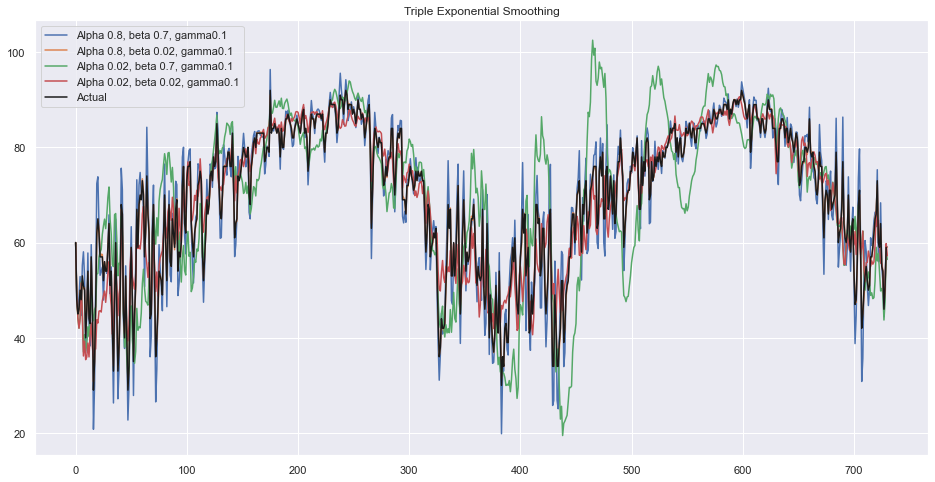

In [91]:
#Plot triple Exponential Smoothing function with multiple parameters
plot_triple_exp(obser[:730], seasonals, season_len, 1000,alphas=[0.8, 0.02], betas=[0.7, 0.02], gammas=[.1])

In [97]:
#Choose parameters with less residuals and create new DataFrame with results
triple=triple_exp_smoothing(obser,seasonals, season_len, .02, .02, .1)
triple=pd.DataFrame(triple)
triple['Date']=data.Date
triple.columns=['DailyTemp','Date']
triple.head()

,DailyTemp,Date
0,60.000000,2013-12-21
1,49.282967,2013-12-22
2,44.205406,2013-12-23
3,41.997848,2013-12-24
4,44.030308,2013-12-25


In [98]:
#Create new DataFrame with the mean of every 5 values
#Statsmodels SARIMAX function will take longer without aggregation 
temp=np.array(triple['DailyTemp'][:1315])
temp=temp.reshape((5,263), order = 'F')
new=pd.DataFrame(temp)
df=new.mean(axis=0)
df=pd.DataFrame(df)
df.columns=['Temp']
df.head()

,Temp
0,47.903306
1,41.489076
2,38.930620
3,38.615858
4,45.510051


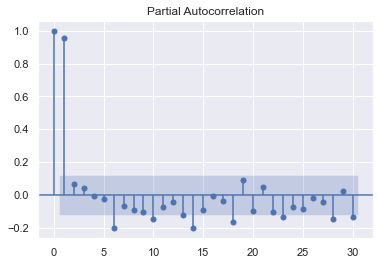

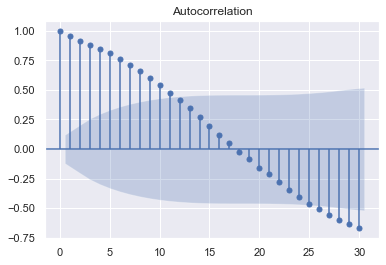

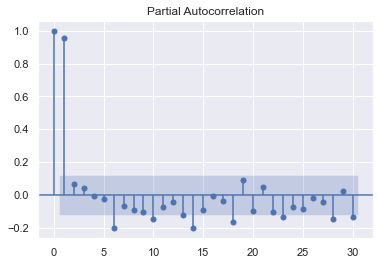

In [99]:
#Plot acf and pacf to find model parameters
smt.graphics.plot_acf(df, lags=30)
smt.graphics.plot_pacf(df, lags=30)

In [100]:
#Displays the Augmented Dickey-Fuller test results
#low pvalue indicates no autocorrelation
test = sm.tsa.stattools.adfuller(df.Temp)
print(test)

(-6.314266818578447, 3.178845968832961e-08, 14, 248, {'1%': -3.4569962781990573, '5%': -2.8732659015936024, '10%': -2.573018897632674}, 1252.8909460514305)


In [101]:
#Split train and test data
train=np.array(df.Temp[:183])
test=np.array(df.Temp[183:])
x1=np.arange(183)
x2=np.arange(183,263)

In [103]:
#Call statsmodels ARMA function to model data and display results
#p=2 because first 2 values in pacf are outside the confidence interval
model = sm.tsa.ARMA(train, (2, 0)).fit(trend='nc', disp=0)
arma_pred = model.predict(start=183, end=262)
arma_mse = mse(test, np.array(arma_pred))
print("MSE: ", arma_mse)
model.summary()


MSE:  143.13944025296666


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  183
Model:                     ARMA(2, 0)   Log Likelihood                -503.312
Method:                       css-mle   S.D. of innovations              3.727
Date:                Thu, 28 Apr 2022   AIC                           1012.624
Time:                        10:13:24   BIC                           1022.252
Sample:                             0   HQIC                          1016.527
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.8553      0.072     11.872      0.000       0.714       0.997
ar.L2.y        0.1434      0.072      1.988      0.047       0.002       0.285
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           +0.0000j            1.0012            0.0000
AR.2           -6.9671           +0.0000j            6.9671            0.5000
-----------------------------------------------------------------------------
"""

In [104]:
#Display summary of SARIMAX function results
#Added seasonal difference parameter because the acf plot had high values at fixed intervals
#The new model has a lower AIC at 443
sar = sm.tsa.statespace.SARIMAX(train, order=(2,0,0), seasonal_order=(0,1,0,73)).fit()
sarima_pred = sar.predict(start=183, end=262)
sarima_mse = mse(test, np.array(sarima_pred))
print("MSE: ", sarima_mse)
sar.summary()

MSE:  8.056177735417902


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  183
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 73)   Log Likelihood                -218.737
Date:                            Thu, 28 Apr 2022   AIC                            443.474
Time:                                    10:13:36   BIC                            451.575
Sample:                                         0   HQIC                           446.760
                                            - 183                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5580      0.084      6.656      0.000       0.394       0.722
ar.L2          0.3531      0.089      3.977      0.000       0.179       0.527
sigma2         3.0786      0.373      8.250      0.000       2.347       3.810
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 3.81
Prob(Q):                              0.83   Prob(JB):                         0.15
Heteroskedasticity (H):               0.89   Skew:                            -0.10
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'SARIMA Model')

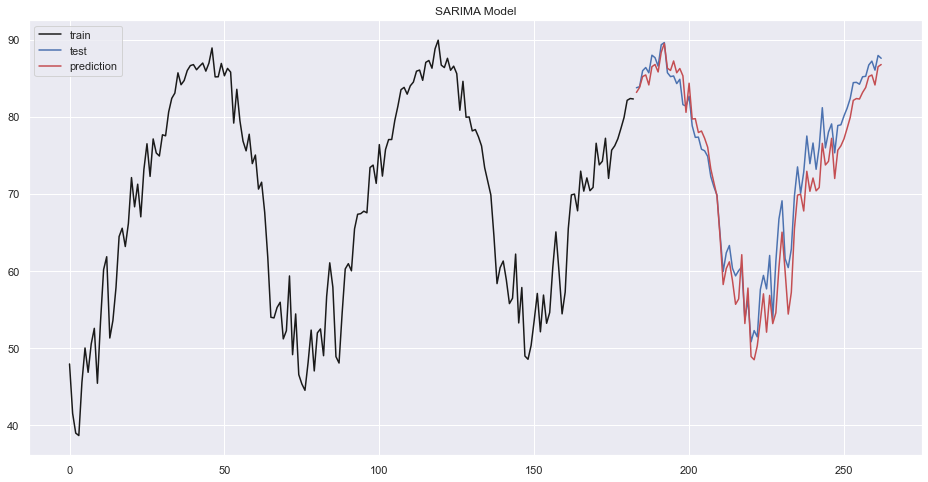

In [105]:
#Plot SARIMA prediction values
plt.figure(figsize=(16, 8))
plt.plot(x1, train,'k', label='train')
plt.plot(x2, test,'b', label='test')
plt.plot(x2, sarima_pred,'r', label='prediction')
plt.legend(loc='best')
plt.title("SARIMA Model")

In [113]:
#Try different combination of parameters to find model with lowest AIC and MSE
#This model lowers the AIC to 441 and mean squared error to 5
sa = sm.tsa.statespace.SARIMAX(train, order=(2,0,0), seasonal_order=(1,1,0,73)).fit()
sarima_pred2 = sa.predict(start=183, end=262)
sarima_mse2 = mse(test, np.array(sarima_pred2))
print("MSE: ", sarima_mse2)
sa.summary()


MSE:  5.3238222996351166


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  183
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 73)   Log Likelihood                -216.757
Date:                            Thu, 28 Apr 2022   AIC                            441.513
Time:                                    10:17:37   BIC                            452.315
Sample:                                         0   HQIC                           445.895
                                            - 183                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6190      0.093      6.685      0.000       0.438       0.801
ar.L2          0.2945      0.094      3.148      0.002       0.111       0.478
ar.S.L73       0.2844      0.120      2.374      0.018       0.050       0.519
sigma2         2.8074      0.345      8.139      0.000       2.131       3.483
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.94
Prob(Q):                              0.99   Prob(JB):                         0.03
Heteroskedasticity (H):               0.85   Skew:                             0.12
Prob(H) (two-sided):                  0.62   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'SARIMA Model')

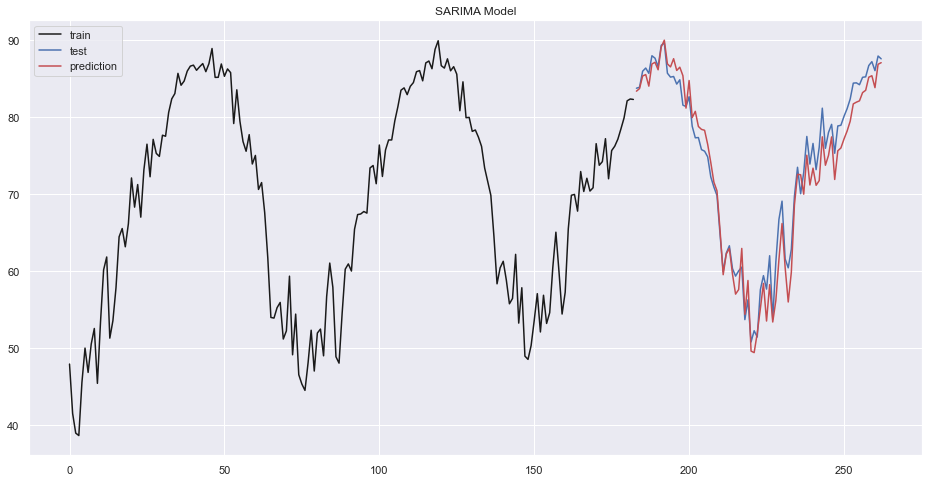

In [114]:
#Plot SARIMAX with different parameters
plt.figure(figsize=(16, 8))
plt.plot(x1, train,'k', label='train')
plt.plot(x2, test,'b', label='test')
plt.plot(x2, sarima_pred2,'r', label='prediction')
plt.legend(loc='best')
plt.title("SARIMA Model")